In [9]:
import gymnasium as gym
import numpy as np

env = gym.make("CartPole-v1", render_mode="human")
observation, _ = env.reset()

weights = np.random.rand(4)

def policy(obs):
    return int(np.dot(weights, obs) > 0)

total_reward = 0
for step in range(200):
    action = policy(observation)
    observation, reward, terminated, truncated, _ = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break

print("Total reward:", total_reward)


env.close()


Total reward: 9.0


Episode 0: total reward = 28.0
Episode 1: total reward = 19.0
Episode 2: total reward = 85.0
Episode 3: total reward = 26.0
Episode 4: total reward = 21.0
Episode 5: total reward = 27.0
Episode 6: total reward = 85.0
Episode 7: total reward = 40.0
Episode 8: total reward = 34.0
Episode 9: total reward = 39.0
Episode 10: total reward = 28.0
Episode 11: total reward = 38.0
Episode 12: total reward = 22.0
Episode 13: total reward = 12.0
Episode 14: total reward = 45.0
Episode 15: total reward = 27.0
Episode 16: total reward = 38.0
Episode 17: total reward = 35.0
Episode 18: total reward = 45.0
Episode 19: total reward = 78.0
Episode 20: total reward = 68.0
Episode 21: total reward = 35.0
Episode 22: total reward = 32.0
Episode 23: total reward = 31.0
Episode 24: total reward = 53.0
Episode 25: total reward = 38.0
Episode 26: total reward = 24.0
Episode 27: total reward = 15.0
Episode 28: total reward = 29.0
Episode 29: total reward = 39.0
Episode 30: total reward = 12.0
Episode 31: total 

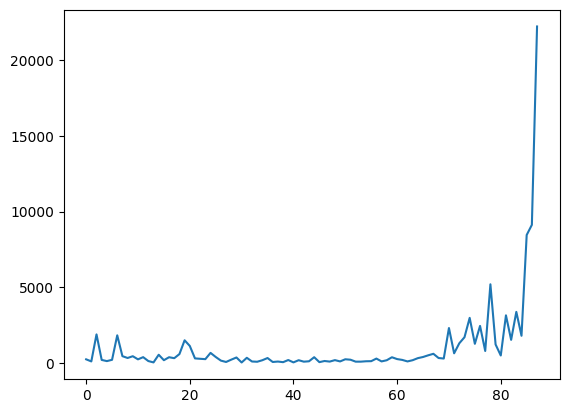

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# --- Policy Network ---
class PolicyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(4, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Softmax(dim=-1)  # Probability distribution over actions
        )

    def forward(self, x):
        return self.model(x)

# --- Discounted reward computation ---
def compute_returns(rewards, gamma=0.99):
    returns = []
    R = 0
    for r in reversed(rewards):
        R = r + gamma * R
        returns.insert(0, R)
    return torch.tensor(returns, dtype=torch.float32)

# --- Training Loop ---
def train():
    env = gym.make("CartPole-v1")
    policy = PolicyNet()
    optimizer = optim.Adam(policy.parameters(), lr=1e-2)
    losses = []

    for episode in range(500):
        observation, _ = env.reset()
        log_probs = []
        rewards = []

        for t in range(500):
            obs_tensor = torch.tensor(observation, dtype=torch.float32)
            action_probs = policy(obs_tensor)
            dist = torch.distributions.Categorical(action_probs)
            action = dist.sample()

            log_probs.append(dist.log_prob(action))
            observation, reward, terminated, truncated, _ = env.step(action.item())
            rewards.append(reward)

            if terminated or truncated:
                break

        returns = compute_returns(rewards)
        loss = -torch.sum(torch.stack(log_probs) * returns)

        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Episode {episode}: total reward = {sum(rewards)}")

        if sum(rewards) >= 475:
            print("🎯 Solved!")
            plt.plot(losses)
            plt.show()
            break

    env.close()

if __name__ == "__main__":
    train()
